In [37]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import sklearn.datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [9]:
house_price_dataset = sklearn.datasets.fetch_california_housing()
house_price_dataframe = pd.DataFrame(house_price_dataset.data,columns = house_price_dataset.feature_names)
house_price_dataframe['Price'] = house_price_dataset.target
X = house_price_dataframe.drop(['Price'],axis=1)
Y = house_price_dataframe['Price']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [15]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # 输入层和第一个隐藏层
model.add(Dense(32, activation='relu'))  # 第二个隐藏层
model.add(Dense(1))  # 输出层，回归问题通常只有一个输出节点

In [43]:
model.compile(optimizer=Adam(), loss='mean_squared_error')

In [45]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/100
826/826 [==============================] - 1s 907us/step - loss: 0.4824 - val_loss: 0.4838
Epoch 2/100
826/826 [==============================] - 1s 825us/step - loss: 0.4792 - val_loss: 0.4563
Epoch 3/100
826/826 [==============================] - 1s 811us/step - loss: 0.4879 - val_loss: 0.4889
Epoch 4/100
826/826 [==============================] - 1s 811us/step - loss: 0.4951 - val_loss: 0.4543
Epoch 5/100
826/826 [==============================] - 1s 811us/step - loss: 0.4836 - val_loss: 0.4816
Epoch 6/100
826/826 [==============================] - 1s 821us/step - loss: 0.4749 - val_loss: 0.5062
Epoch 7/100
826/826 [==============================] - 1s 818us/step - loss: 0.4735 - val_loss: 0.4585
Epoch 8/100
826/826 [==============================] - 1s 811us/step - loss: 0.4701 - val_loss: 0.5088
Epoch 9/100
826/826 [==============================] - 1s 816us/step - loss: 0.4833 - val_loss: 0.4525
Epoch 10/100
826/826 [==============================] - 1s 824us/step - l

In [49]:
Y_train_pred = model.predict(X_train)
r2_train = metrics.r2_score(Y_train,Y_train_pred)
print(r2_train)
mse_train = mean_squared_error(Y_train,Y_train_pred)
print(mse_train)

516/516 [==============================] - 0s 556us/step
0.677494146609436
0.4255168680398882


In [51]:
Y_test_pred = model.predict(X_test)
r2_test = metrics.r2_score(Y_test,Y_test_pred)
print(r2_test)
mse_test = mean_squared_error(Y_test,Y_test_pred)
print(mse_test)

129/129 [==============================] - 0s 569us/step
0.6699428871196993
0.4553745320061785


In [53]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题

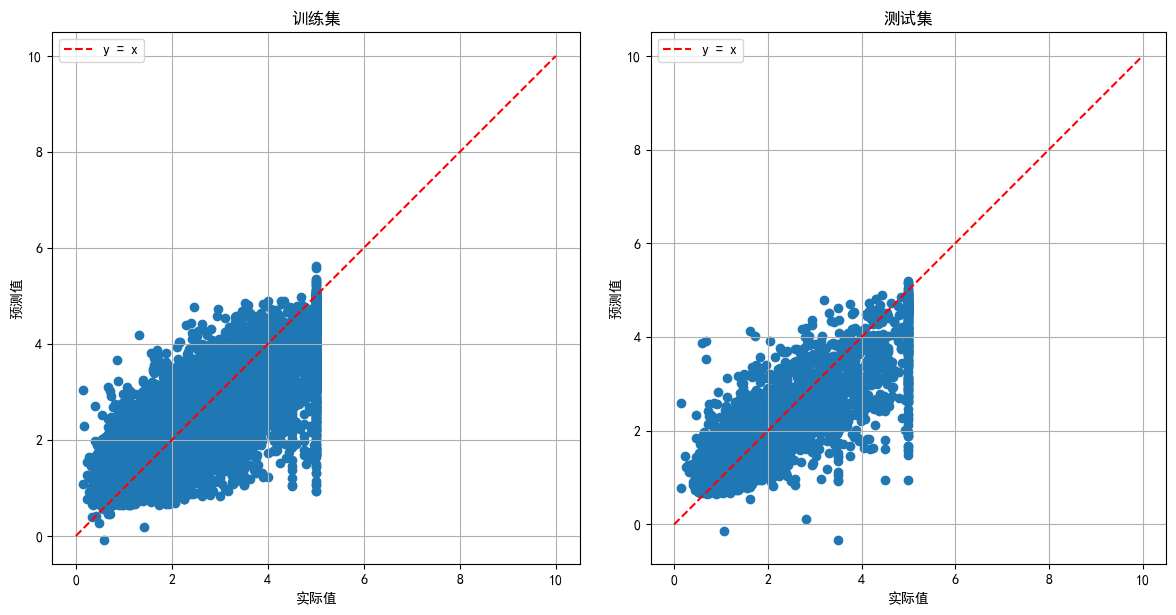

In [77]:
x_values = np.linspace(0, 10, 100)
fig_size = (12, 6)  # 12 英寸宽, 6 英寸高
fig, ax = plt.subplots(1, 2, figsize=fig_size)


ax[0].plot(x_values, x_values, color='red', linestyle='--', label='y = x')
ax[0].scatter(Y_train, Y_train_pred)
ax[0].set_xlabel("实际值")
ax[0].set_ylabel("预测值")
ax[0].set_title("训练集")
ax[0].set_aspect('equal', adjustable='box')
ax[0].legend()
ax[0].grid()

ax[1].plot(x_values, x_values, color='red', linestyle='--', label='y = x')
ax[1].scatter(Y_test, Y_test_pred)
ax[1].set_xlabel("实际值")
ax[1].set_ylabel("预测值")
ax[1].set_title("测试集")
ax[1].set_aspect('equal', adjustable='box')
ax[1].legend()
ax[1].grid()
plt.savefig("深度学习-默认.png", dpi=300, bbox_inches='tight') 
plt.tight_layout()
plt.show()

In [79]:
Y_train_pred = Y_train_pred.flatten()
Y_test_pred = Y_test_pred.flatten()

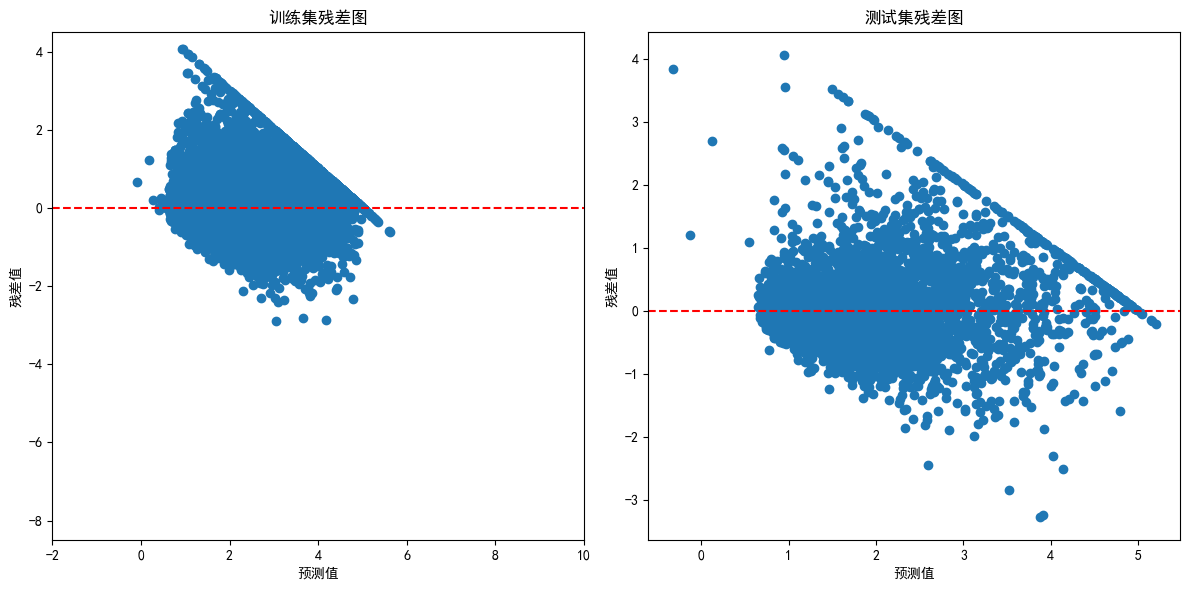

In [81]:
residuals_train = Y_train-Y_train_pred
residuals_test = Y_test-Y_test_pred
fig_size = (12, 6)  # 12 英寸宽, 6 英寸高
fig, ax = plt.subplots(1, 2, figsize=fig_size)

ax[0].scatter(Y_train_pred, residuals_train)
ax[0].axhline(0, color='red', linestyle='--')  # 添加 y=0 的水平线
ax[0].set_title('训练集残差图')
ax[0].set_xlabel('预测值')
ax[0].set_ylabel('残差值')

ax[0].set_xlim(-2, 10)  
ax[0].set_ylim(-8.5, 4.5) 

ax[1].scatter(Y_test_pred, residuals_test)
ax[1].axhline(0, color='red', linestyle='--')  # 添加 y=0 的水平线
ax[1].set_title('测试集残差图')
ax[1].set_xlabel('预测值')
ax[1].set_ylabel('残差值')

ax[0].set_xlim(-2, 10)  
ax[0].set_ylim(-8.5, 4.5) 
plt.savefig("深度学习-默认-残差.png", dpi=300, bbox_inches='tight') 
plt.tight_layout()
plt.show()
